# Cardiac Dysrhythmia Detection using Neural Networks

## Abstract

Our heartbeat is controlled by our body through electrical impulses which generates a contraction that results in the blood movement throughout our body. An irregular heartbeat is called an dysrhythmia or arrhythmia. A normal heart rate ranges from 50–100 beats per minute. Cardiac dysrhythmia occurs when there is irregular electrical activity in our heart. Arrhythmias occur with normal or disturbed heart rate(rapid or slow). Effects of arrhythmia range from discomfort to cardiac arrest. They are responsible for nearly 1 million deaths every year in United States alone.

We need machine learning approach to that detects the anomalies in the heartbeat and produce a program that does the job of detecting these irregularities. In this blog, we are trying to explain how we have implemented supervised learning algorithms and neural networks to solve the problem of abnormality detection in a heartbeat by classifying the ECG sequences as normal or abnormal. 


Our problem statement here is that how do we classify the heartbeat to a concerned category.

The main purpose of the project is to evaluate the performance of neural networks on classifying electrocardiogram (ECG) sequences as normal or abnormal. We are designing neural network models using significant hyperparameter tuning to evaluate the performance of the models in classifiying the heart beat sequences as normal or abnormal and as well classifying abnormal heart rate further into 5 multiclass classification

#### Project requirements: 
The project can be implemented using python in Jupyter notebook by installing all required python libraries for deep learning and neural networks.

#### Problems Addressed:
The main problem is that a cardiac dysrhythmia refers to any abnormality in a beating heart. By observing the ECG waveforms, diagnosis of any abnormalities can be done. Addressing these abnormalities will help the healthcare systems in automated arrythmia detection systems. We are mainly concerned with 2 sub problems in this abnormality detection. Firstly, we want to classify every record into a normal or abnormal class. Also, in an abnormal case, identifying the specific case of dysrhythmia present in the patient.

## Data

##### This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network. 
 

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.


All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188. 

### The MIT-BIH Arrhythmia Dataset                                                 

Number of Samples: 109446

Number of Categories: 5

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes:[0, 1, 2, 3, 4]

0 : Non-ecotic beats (normal beat) 

1 : Supraventricular ectopic beats 

2: Ventricular ectopic beats

3 : Fusion Beats 

4 : Unknown Beats

### The PTB Diagnostic ECG Database                                                               

Number of Samples: 14552

Number of Categories: 2

Data Source: Physionet's PTB Diagnostic Database

0 : Normal

1 : Abnormal

## Exploratory Data Analysis

Exploratory data analysis is the first step of the data analysis process. It is the bird's eye view of the data and tries to make sense out of it. Few purposes of EDA include:
Check for missing data, Gain maximum insight into the data set and its underlying structure, Uncover a parsimonious model, one which explains the data with a minimum number of predictor variables, 
Find parameter estimates and their associated confidence intervals or margins of error, Identify the most influential variables. 
We will perform EDA on our dataset to see how the dataset is. 

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, Activation, Add, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import *
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\chait\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


We have to make sure that the notebook runs on every system. So data path should be in sync with the current working directory of the user's system. We take the path of the current working directory wherever the .ipynb file and the data is located (or downloaded).

In [2]:
import os
script_path = os.path.dirname(os.path.abspath('__file__'))
script_path

'C:\\Python\\ADS Final Project'

If the path exists, we are appending the four different data files MITBIH (train and test) and PTBDB (test and train) to build the absolute path to load the data

In [3]:
if os.path.exists(script_path):
    mitbih_train = os.path.join(script_path, "mitbih_train.csv")
    mitbih_test = os.path.join(script_path, "mitbih_test.csv")
    ptbdb_abnormal = os.path.join(script_path, "ptbdb_abnormal.csv")
    ptbdb_normal = os.path.join(script_path, "ptbdb_normal.csv")

We can see below that all datasets lie at same path.

In [4]:
print(mitbih_train)
print(mitbih_test)
print(ptbdb_abnormal)
print(ptbdb_normal)

C:\Python\ADS Final Project\mitbih_train.csv
C:\Python\ADS Final Project\mitbih_test.csv
C:\Python\ADS Final Project\ptbdb_abnormal.csv
C:\Python\ADS Final Project\ptbdb_normal.csv


We will be loading the four datasets and appending them - test and train datasets respectively.

In [5]:
#multiclass classification
mitbih_train=pd.read_csv(mitbih_train,header=None)
mitbih_test=pd.read_csv(mitbih_test,header=None)

#binary classification
ptbdb_abnormal=pd.read_csv(ptbdb_abnormal,header=None)
ptbdb_normal=pd.read_csv(ptbdb_normal,header=None)

Concatenating both the test and train datasets for both MIT-BIH & PTBDB

In [6]:
#concating both test and train into one
mitbih = pd.concat([mitbih_train,mitbih_test],axis = 0)

In [7]:
ptbdb = pd.concat([ptbdb_abnormal,ptbdb_normal],axis = 0)

### MITBIH Data

Performing EDA of MITBIH dataset--

In [8]:
mitbih.shape

(109446, 188)

MITBIH has around 188 columns and 109446 samples of data. We can view the first few rows of data using head() function.

In [9]:
mitbih.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


info() function is used to get a concise summary of the dataframe.

In [10]:
mitbih.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


The describe() function computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.Looking at our dataset, the mean, std, min, max, 25%, 50%, 75%  are all closer with respect to their values and thus we can conclude that there are no outliers to eliminate from this MITBIH dataset.

In [11]:
mitbih.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [12]:
mitbih.isnull().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
Length: 188, dtype: bool

The above line of code checks if there are any null values in the dataset. If there are any, then we will need to handle them by either dropping them or replacing them with mean or median values. Also, MITBIH dataset has no null values in their columns.

In [13]:
mitbih[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

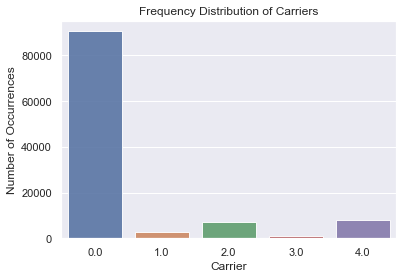

In [19]:
beat_count = mitbih[187].value_counts()
sns.set(style="darkgrid")
sns.barplot(beat_count.index, beat_count.values, alpha=0.9)
plt.title('Distribution of heatbeat across different categories')
plt.ylabel('Total number of occurrences', fontsize=12)
plt.xlabel('Arrythmia categories', fontsize=12)
plt.show()

In MITBIH, the target column - 187, we have a total number of 5 classes, total samples in each classes are as follows 0.0 - 90589, 1.0 - 2779, 2.0 - 7236, 3.0 - 803, 4.0 - 8039..

#### Data Visualizations
The cell below is the visualization of few random heartbeat samples. We have taken the sample size of 10 and plotted the ECG sequences in graph for visualization. For the same 10 samples we are seeing the count for each group in the form of plots and graphs.

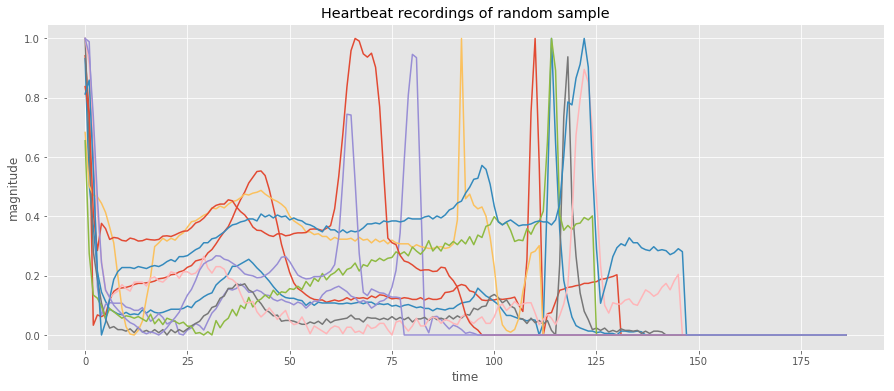

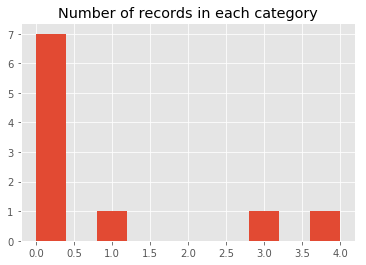

In [13]:
sample = mitbih.sample(10)
# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]
# plt samples
plt.figure(figsize=(15,6))
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("Heartbeat recordings of random sample")
plt.show()
plt.style.use("ggplot")
plt.title("Number of records in each category")
plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

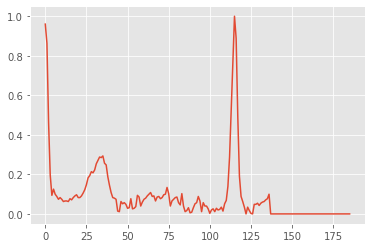

In [15]:
# show one data
plt.plot(mitbih.iloc[1,:186])

Plotting a sample of data or a complete record to visualize the complete ECG sample / hearbeat from the dataset.

### Train Test Split of MITBIH

Considering the target variable into y and the remaining dependant features into X variable

In [24]:
X=mitbih.drop([187],axis=1)
y=mitbih[187]

Using Test train split, dividing the dataset into 80% training data and remaining 20% as the test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

Shape of our train and test data is as below

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87556, 187)
(21890, 187)
(87556,)
(21890,)


# Random Forest Classifier

To classify the target variable into their respective 5 set of classes - 0, 1, 2, 3, 4, we use Random Forest Classifier. 

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It fetches the prediction from each tree and selects the prediction result with the maximum votes as the final prediction. 
We implemented the same by firstly importing the random forest model from sklearn.ensemble class. We created an object of random forest classifier with n_estimator as our hyperparameter. We kept the value of that hyperparameter as 10. We then trained the model on our training set i.e. X_train and y_train.






#### Model development and training

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest=RandomForestClassifier(n_estimators=10, max_depth=5)

#Train the model using the training sets
forest.fit(X_train,y_train)

#predicting values for test set using the model
y_pred=forest.predict(X_test)

In [320]:
rfc_cv_score = cross_val_score(forest, X, y, cv=5, scoring='f1_macro').mean()

Once the model was trained for our data, we predicted the values for test set as well as train set. This lead us to have 2 different kinds of accuracy score i.e. training score and test score. We performed cross validation with k=5. Cross-validation is a way to evaluate machine learning models on a limited data sample. We have a parameter called k that refers to the number of groups that a given data sample is to be divided into, which in our case is 5.

#### Model Evaluations and prediction

In [321]:
y_pred1=forest.predict(X_train)

We are also making sure that the data is not overfitting, by predicting both on the test set and train set.

In [322]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred1)

0.9971446845447485

In [323]:
accuracy_score(y_test,y_pred)

0.9721790772042028

Considering accuracy as one of the evaluation metric which determines the number of correct predictions over total number of predictions. As we can see that both the accuracy for test and train is closely similar and negligibly overfitting by around 2%.

In [332]:
results = pd.get_dummies(y_pred)
results.columns = ['p0','p1','p2','p3','p4']
results.tail(10)

,p0,p1,p2,p3,p4
21880,1,0,0,0,0
21881,1,0,0,0,0
21882,1,0,0,0,0
21883,1,0,0,0,0
21884,0,0,1,0,0
21885,1,0,0,0,0
21886,1,0,0,0,0
21887,1,0,0,0,0
21888,1,0,0,0,0
21889,1,0,0,0,0


We are trying to predict or classify into all classes using random forest algorithm and saving into a file for reference.

In [334]:
results.to_csv('random_forest.csv')

In [333]:
print("Classification Report")
print(classification_report(y_test, y_pred))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18160
         1.0       0.98      0.61      0.75       535
         2.0       0.95      0.88      0.91      1402
         3.0       0.86      0.53      0.65       158
         4.0       0.99      0.94      0.96      1635

    accuracy                           0.97     21890
   macro avg       0.95      0.79      0.85     21890
weighted avg       0.97      0.97      0.97     21890



All AUC Scores
0.8603596875829936


Mean AUC Score
Mean AUC Score - Random Forest:  0.8603596875829936


Classification report consists of precision, recall, f1-score and support variables all of which basically tells us used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report.                                 
Precision basically tells us the result relevancy, or which tells us to what percentage of teh results are relevant to the original results.  Recall refers to the percentage of total relevant results correctly classified by your algorithm.
F1 score is a hramonic mean of both preision and recall. The support is the number of samples of the true response that lie in that class.
From our results we see that, precision values for all the 5 classes is close to 1 (precision of 1 is an ideal value) which is good meaning every result is relevant., Recall is closer to 1 for other classes, also equal to 1 in case of class 0 which means that number of positive class predictions made out of all positive samples in the dataset. Support provides us the number of samples of the true response that lie in all 5 classes.

#### Model Conclusion
The Random forest classifier model performed well. The training and testing accuracy are almost similar. Thus we can derive that there is no overfitting or underfitting.Our AUC score is 0.86 which means model is good classifier. We can say that this model is a good model.
The AUC score is 0.86 which means that the predictions are 86% correct.

#### Assessment Questions

1. Why did you choose random forest algorithm?

Random forest classifier will handle the missing values. It wont overfit the model when we have more  trees in the forest.

2. How does random forest algorithm work?

Random forest starts with selecting k out of m features. Using these k features, we are finding the rootnode by best split approach. We then split the nodes to child nodes using the best split approach. We build a forest by repeating above steps for n number of times to create n number of trees.

3. How did you perform cross validation?
We performed cross validation with k=5. Cross-validation is a way to evaluate machine learning models on a limited data sample. We have a parameter called k that refers to the number of groups that a given data sample is to be divided into, which in our case is 5.


                             
4. How does bagging work?
       
   
1. Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.

2. A base model is created on each of these subsets.

3. Each model is learned in parallel from each training set and independent of each other.

4. The final predictions are determined by combining the predictions from all the models.

Random Forest makes a small tweak to the bagging and results in powerful classifier.
    
5. How did the model perform?

The training and testing accuracy were 99% and 97% respectively. Thus we can derive that there was no overfitting or underfitting. Our AUC score is 0.86 which means model is good classifier and the predictions are 86% correct.

6. What all hyperparameters did you use? What are the other important hyperparameters?

We used n_estimators=10. Other important hyperparameters are:
n_estimators = number of trees in the forest; max_features = max number of features considered for splitting a node; max_depth = max number of levels in each decision tree; min_samples_split = min number of data points placed in a node before the node is split; min_samples_leaf = min number of data points allowed in a leaf node; bootstrap = method for sampling data points


# Support Vector Machine

The objective of the support vector machine is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the the five classes of data points in our case in MITBIH dataset, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Hyperplanes are the decision boundaries use to classify the data points or data calsses and support vector are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using which we can maximize the margin of our classifier.

#### Model Development and Training

In [28]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC() # Linear Kernel
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

We have predicted the response for test dataset. We will predict the response on train dataset and compare the scores between train and test data to see if there is any overfitting.

In [29]:
y_pred1 = clf.predict(X_train)

In [30]:
score = cross_val_score(clf,X_train,y_train,cv=3, scoring = 'f1_macro').mean()

To prevent from over fitting of the model, we are cross checking on both the test and train dataset.

#### Model Evaluation and Predictions

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred1)

0.9706473571200146

In [33]:
accuracy_score(y_test,y_pred)

0.9681589767016903

Again, we see that the accuracy score is very close to each other and hence we can consider it not overfitting 

In [35]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[18118     7    30     1     4]
 [  204   323     8     0     0]
 [  181     0  1196    20     5]
 [   81     0     8    69     0]
 [  135     0    13     0  1487]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18160
         1.0       0.98      0.60      0.75       535
         2.0       0.95      0.85      0.90      1402
         3.0       0.77      0.44      0.56       158
         4.0       0.99      0.91      0.95      1635

    accuracy                           0.97     21890
   macro avg       0.93      0.76      0.83     21890
weighted avg       0.97      0.97      0.97     21890



Confusion matrices are a good indicator of false positive and false negative rates.

The classification report that talks about our predictions (TP,TN,FP,FN) all the values are closer to 1 (except that of class 3.0), where we can conclude that for the remaining classes with values closer to 1 means that number of positive class predictions actually belong to the positive class, and also correctly identifying positive results as the true positives.

In [36]:
results = pd.get_dummies(y_pred)
results.columns = ['p0','p1','p2','p3','p4']
results.tail(10)

,p0,p1,p2,p3,p4
21880,1,0,0,0,0
21881,1,0,0,0,0
21882,1,0,0,0,0
21883,1,0,0,0,0
21884,0,0,0,0,1
21885,1,0,0,0,0
21886,1,0,0,0,0
21887,1,0,0,0,0
21888,1,0,0,0,0
21889,1,0,0,0,0


In [41]:
print("Mean AUC Score - SVM: ", score.mean())

Mean AUC Score - SVM:  0.8179426857425739


AUC score of 81% is good indicating that it is correctly identify positive results to get the true positive rate; but lesser compared to random forest.

In [37]:
results.to_csv('SVM.csv')

Saving the predictions or classfication of the model into 5 classes is done here for reference.

#### Model Conclusion
The SVM model performed well. The training and testing accuracy are almost similar. Thus we can derive that there is no overfitting or underfitting. The accuracy of this model is 96% and AUC score is 0.81 which means model is good classifier. We can say that this model is predicting better. The AUC score is 0.81 which means that the predictions are 81% correct.

#### Assessment Questions

1. How does SVM work?

Given a set of training examples, each belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

2. How did the model perform?

The training and testing accuracy are 97% and 96%. Thus, we can derive that there is no overfitting or underfitting. AUC score is 0.81 which means model is good classifier and the predictions are 81% correct.

3. What are the important hyperparameters?


 C, gamma and kernel
 
4. How does one adjust the support in SVM?

 By adjusting Budget C
 
 
 
5. How does one adjust the bias in SVM?

By adjusting Gamma



6. How are you cross checking if the data is overfitting or not?
We are predicting values for both test and train data and checking if the accuracy scores do not have much difference between them. If there exists too much differnce between them and if test accuracy is way more than that of training accuracy score we say the model is underfitting and if the training accuracy is way more than the test accuracy we say it is overfitting the data.


## Convolutional Neural Network (CNN)

A Convolutional Neural Network (ConvNet/CNN) is a deep learning algorithm which can take in input dataset, assign importance in form of weights to various aspects iand be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. ConvNets have the ability to learn characteristics. The layers in the CNN model consists of a convolutional layer, activation layer, pooling layer, and fully connected layer, these are all interconnected so that CNNs can process and perceive data in order to classify them. 

We started with a baseline model to see how that worked out. We split out data in a different way here.

## Baseline Model 

To build the CNN model, we are using to_categorical, in which a categorical variable takes on a limited, and usually fixed, number of possible values. In this case it is the number of classes is 5. 

#### Train and test split of data for Neural networks

In [19]:
X=mitbih.iloc[:,:187].values
target=mitbih[187]
y=to_categorical(target)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [20]:
print(X_train.shape)
print(y_train.shape)

(87556, 187, 1)
(87556, 5)


In [21]:
mitbih.iloc[:,:187]

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
mitbih[187]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 109446, dtype: float64

In [23]:
train_input_shape=(187,1)
batch_size = 64
epochs = 25

#### Model development and training

Lets start building the CNN model with 4 layers. Our input shape that we are feeding to the CNN is (187,1). Now let us look at few terminologies regarding the model that we are going to build.

Sequential():It is a simplest model defined in Sequential class which is a linear stack of layers.We can create a Sequential model by passing a list of layer instances to the constructor.

Conv1D(): It is a layer which creates a convolutional kernel that is convolved with a input layer over a single spatial dimensions to produce tensor of outputs. Arguments used for this layers are as below:

filters: It represents the number of output filters in convolution
    
Kernel_size: It specifies the length of the 1D convolution window.
    
activation function:This function determines the output of the neural network. It determines whether each function should be activated or not.

input_shape:It represents the input shape that we are feeding the network.
    
BatchNormalization(): It standardizes the inputs to a layer for each mini-batch. It stabilizes the learning process and rduces the number of training epochs required to train the network

MAxPooling1D(): It is a downsampling strategy of CNN. MaxPooling1D is done for temporal data. The arguments used for this layers are as below:

pool_size: It is the size of max pooling windows

stride: It is the factor by which we will downscale

Padding: It applies padding to the input image so that the input image gets fully covered by the filter and specified stride.We are using SAME because, for stride 1 , the output will be the same as the input.

Flatten():This function reshapes the tensor to have the shape which is equal to the number of elements contained in tensor not including the batch dimension. This means that it removes all the dimensions except for one.

Dense(): It is a regular deeply connected neural network layer. It performs the below operation on input and return the output.
output = activation(dot(input, kernel) + bias)
where,input represent input data

kernel represent weight data

dot represent numpy dot product of all input and its corresponding weights

bias represent a biased value to optimize the model

activation represent activation function.

In [24]:
model =  tf.keras.models.Sequential()
model.add(Conv1D(64, (6), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=(3), strides=(2), padding="same"))
model.add(Conv1D(64, (6), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=(2), strides=(2), padding="same"))
model.add(Conv1D(64, (3), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 182, 64)           448       
_________________________________________________________________
batch_normalization (BatchNo (None, 182, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 91, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 86, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 86, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 43, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 64)            1

For the above model, we needed to compile the model and fit the model to train the data. We are using SGD optimizer for compiling the model. 

SGD is a optimizer wherein one update is performed at a time. It performs the frequent updates with high variance and includes support for momentum, learning rate decay, and nesterov momentum. 

Momentum and Nesterov Momentum help us to speed up training and improve convergence significantly. Learning rate is a value that determines how fast the weights change. We need to provide a balanced learning rate. We used 0.01 as initial value.

Here we are giving learning rate as 0.01 using trial and error approach to find teh optimal value, also using momentum= 0.9 speeds up the updation of weights and minimizes the loss in the process.


In [25]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], optimizer=sgd)
result1 = model.fit(X_train, y_train,batch_size=batch_size,epochs=15,validation_data=(X_test,y_test))

Train on 87556 samples, validate on 21890 samples
Epoch 1/15
87556/87556 [==============================] - 138s 2ms/sample - loss: 0.1372 - categorical_accuracy: 0.9620 - val_loss: 0.1746 - val_categorical_accuracy: 0.9508
Epoch 2/15
87556/87556 [==============================] - 156s 2ms/sample - loss: 0.0831 - categorical_accuracy: 0.9769 - val_loss: 0.0855 - val_categorical_accuracy: 0.9758
Epoch 3/15
87556/87556 [==============================] - 156s 2ms/sample - loss: 0.0641 - categorical_accuracy: 0.9816 - val_loss: 0.0709 - val_categorical_accuracy: 0.9797
Epoch 4/15
87556/87556 [==============================] - 174s 2ms/sample - loss: 0.0551 - categorical_accuracy: 0.9837 - val_loss: 0.0805 - val_categorical_accuracy: 0.9765
Epoch 5/15
87556/87556 [==============================] - 174s 2ms/sample - loss: 0.0481 - categorical_accuracy: 0.9856 - val_loss: 0.0565 - val_categorical_accuracy: 0.9837
Epoch 6/15
87556/87556 [==============================] - 159s 2ms/sample - loss

#### Model Evaluation and prediction

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

21890/21890 [==============================] - 8s 371us/sample - loss: 0.0598 - categorical_accuracy: 0.9849
0.05975148903633361 0.9849246


The loss generated for this CNN model is 0.064 and accuracy is 0.98. Now let us plot the training and validation loss and accuracy. The fit() method of keras model returns a history object that records the loss and acuuracy values during the training. We are storing the same in a dict form and we call the plot_training_accuracy() function where we pass the dictionary as arguments.

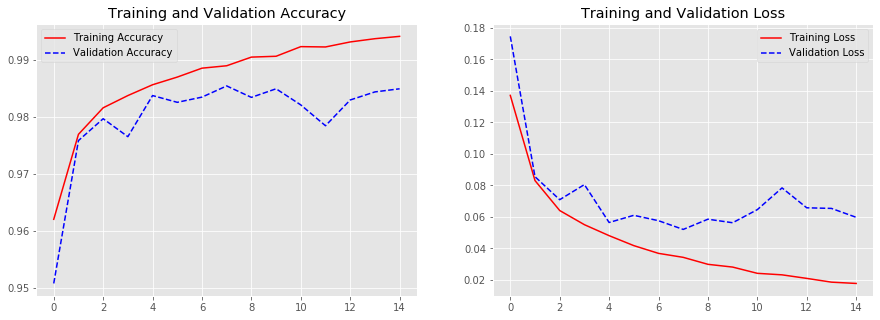

In [27]:
result1_hist = {}
result1_hist['loss'] = result1.history['loss']
result1_hist['categorical_accuracy'] = result1.history['categorical_accuracy']
result1_hist['val_loss'] = result1.history['val_loss']
result1_hist['val_categorical_accuracy'] = result1.history['val_categorical_accuracy']
# Plot the training graph
def plot_training(history):
    acc = history['categorical_accuracy']
    val_acc = history['val_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')
    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    plt.show()
    
    
plot_training(result1_hist)

We see that training accuracy and loss is constant through out. But the validaytion accuracy and loss is fluctuating too much. We need to handle this. But although, the data clsoely fits and there is negligible differnce in both their accuracy and their losses.We can do this in various ways. We can increase the number of epochs, the optimizer function, the cost function or the value of learning rate.

In [28]:
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(sklearn.metrics.log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.060
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18160
           1       0.89      0.81      0.85       535
           2       0.96      0.94      0.95      1402
           3       0.79      0.76      0.77       158
           4       0.99      0.99      0.99      1635

    accuracy                           0.98     21890
   macro avg       0.92      0.90      0.91     21890
weighted avg       0.98      0.98      0.98     21890



In [29]:
from sklearn.metrics import classification_report, log_loss
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.060
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18160
           1       0.89      0.81      0.85       535
           2       0.96      0.94      0.95      1402
           3       0.79      0.76      0.77       158
           4       0.99      0.99      0.99      1635

    accuracy                           0.98     21890
   macro avg       0.92      0.90      0.91     21890
weighted avg       0.98      0.98      0.98     21890



The precision and recall score for all the classes is closer to 1 which is good.

In the above cell, we have predicted the values for test data with the model that was generated. The log loss value is 0.060 which is very low and good. We will print the confusion matrix to see the number of correct and incorrect predictions.

In [30]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1','2','3','4'],
                        columns=['pred_0', 'pred_1','pred_2','pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18072,48,29,4,7
1,89,435,10,0,1
2,47,5,1320,28,2
3,25,1,12,120,0
4,16,1,5,0,1613


#### Model Conclusion

The baseline model worked well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs and reaches a plateau during the final epochs. This shows that baseline model reaches a desired accuracy within 14 epochs. The loss value curves stabilizes during the last few epochs of the entire duration of the training process. We can say that this model is a good model.

### Assessment Questions

1. What is Deep Learning?

Deep learning is a subset of machine learning which allows machines to solve complex problems using a data set that can be very unstructured and large.


2. What are neural networks?

A neural network is a type of machine learning which models itself after the human brain, creating an artificial neural network that via an algorithm allows the computer to learn on its own. It consistes of layers of neurons/nodes that perform the computations to be able to solve the problem.


3. What were the hyperparameters used in this model?


With the SGD optimizer we used the learning rate of 0.01, decay of 1e-6, momentum og 0.9. Upon adding these for a 4 layered CNN, we ran the model for 15 epochs.

4. How did the model perform with these values?

These hyperparameters achieved the accuracy of 98% with a loss of 0.05.

5. What other activation functions can be used other than relu?

We can use elu, leakyRelu.

6. Waht is Mini-Batch Gradient Descent? What are the benefits of Mini-Batch Gradient Descent?


 
It iss a variant of Stochastic Gradient Descent and instead of using a single training sample, mini-batch of samples is used for performing cost calculation operation. Hence, the process gets faster.


7. How does it affect how quickly the network plateaus?

The baseline model worked well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs and reaches a plateau during the final epochs. This shows that baseline model reaches a desired accuracy within 14 epochs. The loss value curves stabilizes during the last few epochs of the entire duration of the training process.
We can say that this model is a good model.

## Model 2- Hyperparameter tuning of the CNN model

We will increase the number of convolutional layers from 3 to 4. We will have a batch of 4 convolutional layers followed by Batch normalization, max pooling and droput layer conncted to a fully connected dense layer to predict the output of 5 classes. Increasing the epochs size from 15 to 50,along with batch size from 64 to 128

#### Model Development and training

In [36]:
epochs = 50
batch_size =128

In [37]:
model1 =  tf.keras.models.Sequential()
model1.add(Conv1D(32, (6), activation='relu', input_shape=(train_input_shape)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=(3), strides=(2), padding="same"))

model1.add(Conv1D(64, (6), activation='relu', input_shape=(train_input_shape)))
model1.add(BatchNormalization())
model1.add(Dropout(0.25))
model1.add(MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model1.add(Conv1D(128, (3), activation='relu', input_shape=(train_input_shape)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=(2), strides=(2), padding="same"))
model1.add(Dropout(0.25))

model1.add(Conv1D(256, (3), activation='relu', input_shape=(train_input_shape)))
model1.add(BatchNormalization())
model1.add(MaxPooling1D(pool_size=(2), strides=(2), padding="same"))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(5, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 182, 32)           224       
_________________________________________________________________
batch_normalization_3 (Batch (None, 182, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 91, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 86, 64)            12352     
_________________________________________________________________
batch_normalization_4 (Batch (None, 86, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 86, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 43, 64)           

We are chnaging the optimizer from SGD to ADAM, Adam is an optimization algorithm that can be used to update network weights iteratively based in training data. We will specify learning rate argument. Its value determines how fast the weights change. If learning rate is too high derivative may miss the 0 slope point or if the learning rate is too low then it may take forever to reach that point.Using trial and error approach we have chnaged to 0.001,

In [39]:
adam = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics = [metrics.categorical_accuracy], optimizer=adam)
result2 = model.fit(X_train, y_train,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(X_test,y_test))

Train on 87556 samples, validate on 21890 samples
Epoch 1/50
87556/87556 [==============================] - 134s 2ms/sample - loss: 0.0368 - categorical_accuracy: 0.9883 - val_loss: 0.0705 - val_categorical_accuracy: 0.9814
Epoch 2/50
87556/87556 [==============================] - 139s 2ms/sample - loss: 0.0298 - categorical_accuracy: 0.9900 - val_loss: 0.0657 - val_categorical_accuracy: 0.9820
Epoch 3/50
87556/87556 [==============================] - 140s 2ms/sample - loss: 0.0284 - categorical_accuracy: 0.9906 - val_loss: 0.0757 - val_categorical_accuracy: 0.9832
Epoch 4/50
87556/87556 [==============================] - 140s 2ms/sample - loss: 0.0231 - categorical_accuracy: 0.9918 - val_loss: 0.0616 - val_categorical_accuracy: 0.9846
Epoch 5/50
87556/87556 [==============================] - 142s 2ms/sample - loss: 0.0219 - categorical_accuracy: 0.9926 - val_loss: 0.0587 - val_categorical_accuracy: 0.9864
Epoch 6/50
87556/87556 [==============================] - 139s 2ms/sample - loss

#### Model Evaluation and Predictions

In [40]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

21890/21890 [==============================] - 4s 200us/sample - loss: 0.0989 - categorical_accuracy: 0.9869
0.09887035132340115 0.98693466


The accuracy of this model is 98.69% which is almost similar to that of the previous CNN model (98.34%), loss here is 0.064 which is much lesser than that of 0.098 from the previous model.

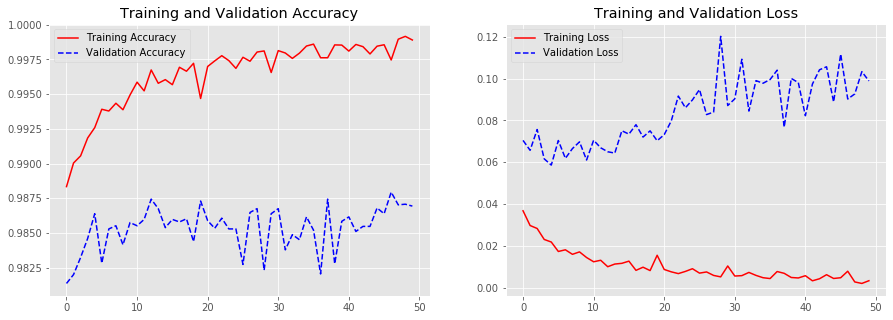

In [44]:
lstm_model1_history = {}
lstm_model1_history['loss'] = result2.history['loss']
lstm_model1_history['categorical_accuracy'] = result2.history['categorical_accuracy']
lstm_model1_history['val_loss'] = result2.history['val_loss']
lstm_model1_history['val_categorical_accuracy'] = result2.history['val_categorical_accuracy']
# Plot the training graph

    
plot_training(lstm_model1_history)

From the above plots, we infer that the data is closely fitting with the test data

In [45]:
from sklearn.metrics import classification_report, log_loss
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.098
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18160
           1       0.91      0.80      0.85       535
           2       0.97      0.96      0.97      1402
           3       0.82      0.82      0.82       158
           4       1.00      0.99      0.99      1635

    accuracy                           0.99     21890
   macro avg       0.94      0.91      0.93     21890
weighted avg       0.99      0.99      0.99     21890



The precision and recall scores is good in this model and the log loss value is 0.098 which is very low and good. We will print the confusion matrix to see the number of correct and incorrect predictions.

In [46]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1','2','3','4'],
                        columns=['pred_0', 'pred_1','pred_2','pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18078,38,22,19,3
1,96,429,7,2,1
2,40,2,1351,8,1
3,16,0,12,130,0
4,16,0,3,0,1616


In [47]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.098
1.0


#### Model Conclusion

The tuned model worked well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. But it does not reach a plateau during the final epochs. Training accuracy plot is thereby not reaching a stable accuracy with 50 epochs too. The loss value curves of the this model doesn't plateau during the entire training process.

We can safely conclude that the baseline model is the best model for CNN.

### Assessment Questions

1. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.001, decay of 1e-6. Upon adding these for a 5 layered CNN, we ran the model for 50 epochs.

2. How did the model perform with these values? Did it outperform the previous model?

These hyperparameters helped the model achieve the accuracy of 98.69% with a loss of 0.098. This model did good in terms of accuracy as there is a slightest increase. But the loss in this model is negligibly more than the baseline model. Taking loss into picture, we can conclude that Baseline model is performing better with respect to this model.

3. How differently does ADAM optimizer work compared to SGD optimizer?

Adam optimizer is a combination of RMSProp and SGD optimzer with Momentum, which tunes its learning rates for different parameters individually whereas SGD has a fixed learning rate throught the process. 

4. How have you changed your layers in this model?

We have added 5 fully connected convolutional layers. In these layers, we have added Dropout rate of 0.25 to prevent the overfitting. 

5. Why have you used BatchNormalization()?

It normalizes the input layer by adding weights as usual but does not add bias.

6. What are the different types of padding?

There is valid and same padding . Valid padding implies no padding at all. The input is left in unaltered shape
Same padding - we add x padding layers such thta output has same dimensions as input.


7. How does it affect how quickly the network plateaus?

The tuned model worked well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. But it does not reach a plateau during the final epochs. Training accuracy plot is thereby not reaching a stable accuracy with 50 epochs too. The loss value curves of the this model doesn't plateau during the entire training process.

We can say that the baseline model is a good model in comparison.

## Long short-term memory(LSTM)

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture and is a type of recurrent neural network capable of learning order dependence in sequence prediction problems. The way LSTM works - An LSTM module has a cell state and three gates which provides them with the power to selectively learn, unlearn or retain information from each of the units. The cell state in LSTM helps the information to flow through the units without being altered by allowing only a few linear interactions. Each unit has an input, output and a forget gate which can add or remove the information to the cell state. LSTMs, the information flows through a mechanism known as cell states. This way, LSTMs can selectively remember or forget things. The information at a particular cell state has three different dependencies. The forget gate decides which information from the previous cell state should be forgotten for which it uses a sigmoid function. The input gate controls the information flow to the current cell state using a point-wise multiplication operation of ‘sigmoid’ and ‘tanh’ respectively. Finally, the output gate decides which information should be passed on to the next hidden state.

### Baseline model

#### Model development and training

Building baseline model we start off with an instance of a Sequential class, followed by the fully connecte dense layer which specifies the input shape of the data which in our case is (187,1) that icnludes 187 columns of data and 1 traget columns predicting 5 different classes.Followed by stacking LSTM layer with relu activation function which is most commonly used which is a linear function that will output the input directly if is positive, otherwise, it will output zero.

Dense layer is a fully connected layer that often follows LSTM layers and is used for outputting a prediction using softmax activation function to predict the probabilities into 5 different classes or it outputs a vector that represents the probability distributions of a list of potential outcomes.

In [48]:
train_input_shape=(187,1)
model=tf.keras.models.Sequential()
model.add(Dense(32,activation='relu',input_shape=train_input_shape))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5,activation='softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 187, 32)           64        
_________________________________________________________________
lstm (LSTM)                  (None, 187, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 16,869
Trainable params: 16,869
Non-trainable params: 0
_________________________________________________________________


We are compiling the model using ADAM optimizer in this case,Adam is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. 

In [50]:
adam_lr=0.1
model.compile(optimizer = Adam(lr=adam_lr) , loss='categorical_crossentropy', metrics=['accuracy'])

We are setting the hyperparameters such as learning rate or the step size it is proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training. We are trying to find the optimal value here by using 0.1 as the starting learning rate using trial and approach method.

Then we try to fit the model by setting the number of epochs = 10 which means a measure of the number of times all of the training vectors are used once to update the weights, also batch size is given 64 that refers to the number of training samples out of the entire dataset utilized in one iteration.

In [51]:
lstm_model=model.fit(X_train, y_train,epochs=10, batch_size=64,validation_data=(X_test,y_test))

Train on 87556 samples, validate on 21890 samples
Epoch 1/10
87556/87556 [==============================] - 285s 3ms/sample - loss: 0.6861 - accuracy: 0.8270 - val_loss: 0.6712 - val_accuracy: 0.8296
Epoch 2/10
87556/87556 [==============================] - 335s 4ms/sample - loss: 0.6799 - accuracy: 0.8272 - val_loss: 0.6616 - val_accuracy: 0.8296
Epoch 3/10
87556/87556 [==============================] - 301s 3ms/sample - loss: 0.6807 - accuracy: 0.8272 - val_loss: 0.7192 - val_accuracy: 0.8296
Epoch 4/10
87556/87556 [==============================] - 335s 4ms/sample - loss: 0.6834 - accuracy: 0.8272 - val_loss: 0.6693 - val_accuracy: 0.8296
Epoch 5/10
87556/87556 [==============================] - 315s 4ms/sample - loss: 0.6822 - accuracy: 0.8272 - val_loss: 0.6745 - val_accuracy: 0.8296
Epoch 6/10
87556/87556 [==============================] - 315s 4ms/sample - loss: 0.6822 - accuracy: 0.8272 - val_loss: 0.6533 - val_accuracy: 0.8296
Epoch 7/10
87556/87556 [==========================

#### Model evaluation and predictions

We have defined a function that will plot the training and validation loss and accuracy using the history() object of model.The fit() method of keras model returns a history object that records the loss and acuuracy values during the training. We are storing the same in a dict form and we call the plot_training_accuracy() function where we pass the dictionary as arguments.

In [47]:
def plot_training_accuracy(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    axes[0].plot(epochs, acc, 'r-', label='Training Accuracy')
    axes[0].plot(epochs, val_acc, 'b--', label='Validation Accuracy')
    axes[0].set_title('Training and Validation Accuracy')
    axes[0].legend(loc='best')
    axes[1].plot(epochs, loss, 'r-', label='Training Loss')
    axes[1].plot(epochs, val_loss, 'b--', label='Validation Loss')
    axes[1].set_title('Training and Validation Loss')
    axes[1].legend(loc='best')
    plt.show()

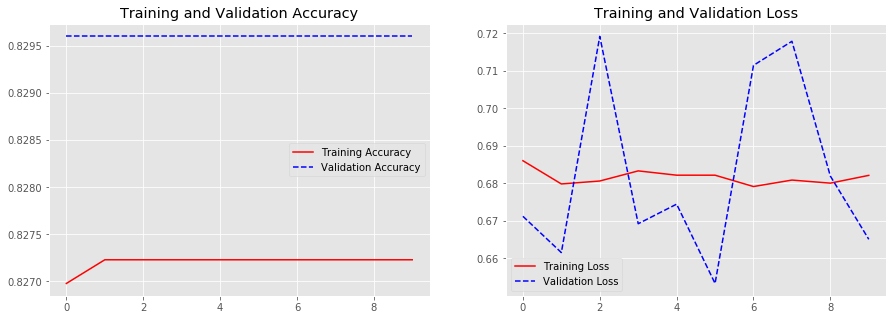

In [54]:
lstm_model_hist = {}
lstm_model_hist['loss'] = lstm_model.history['loss']
lstm_model_hist['accuracy'] = lstm_model.history['accuracy']
lstm_model_hist['val_loss'] = lstm_model.history['val_loss']
lstm_model_hist['val_accuracy'] = lstm_model.history['val_accuracy']
    
plot_training_accuracy(lstm_model_hist)

From the above plot we infer that, Testing accuracy and training accuracy is not much of a difference, the values are pretty close in the range of 82.7 to 82.9 with the number of epochs. Also speaking with respect to the loss graph, the values of training loss and testing loss with the number of epochs is also closely similar ranging from 0.66 to 0.72.Hence it is not overfitting or underfitting.

In [55]:
from sklearn.metrics import classification_report, log_loss
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.665
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18160
           1       0.00      0.00      0.00       535
           2       0.00      0.00      0.00      1402
           3       0.00      0.00      0.00       158
           4       0.00      0.00      0.00      1635

    accuracy                           0.83     21890
   macro avg       0.17      0.20      0.18     21890
weighted avg       0.69      0.83      0.75     21890



With the above classification report we see that precision value is zero for most of the classes except class - 0 which means that prediction values did not have any true positives predicted. The log loss is 0.665 which is slighlty hihger and closer to 1 than an ideal value of zero.

In [56]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1','2','3','4'],
                        columns=['pred_0', 'pred_1','pred_2','pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18160,0,0,0,0
1,535,0,0,0,0
2,1402,0,0,0,0
3,158,0,0,0,0
4,1635,0,0,0,0


Here , the confusion matrix is not being predicted properpy because all the values lie within predicted class 0 which is not the ideal case with the real test set.

In [57]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.665
0.796445


The log loss value is pretty high - 0.665 and the accuracy of this model is also comparitively lesser which is 82%, along with the wrongly predicting the predictions of each classes. Hence, we will be tuning the hyperparameters and increasing the number of layers along with the number of epochs to better classify each of those 5 classes

#### Model Conclusion
The baseline LSTM model did not do that great. The training accuracy plot depicts how the training accuracy for baseline model is constant throughout with the number of epochs and reaches a plateau during the 4 epochs. This shows that baseline model reaches a desired accuracy within 4 epochs.

The loss value curves stabilizes during the last few epochs of the entire duration of the training process. We can say that this model is a good model. However the model is not doing great with predictions as validation accuracy is good, but there is no stability in the validation loss. The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 0 i.e normal heartbeat which is clearly untrue.

### Assessment Questions

1. How Does LSTM Network Work?

Long-Short-Term Memory (LSTM) is a special kind of recurrent neural network capable of learning long-term dependencies, remembering information for long periods as its default behavior. There are three steps in an LSTM network:

Step 1: The network decides what to forget and what to remember.

Step 2: It selectively updates cell state values.

Step 3: The network decides what part of the current state makes it to the output.


2. What is different about LSTM model?

LSTM is an improvement over RNN to solve the problem of Vanishing and Exploding Gradients

3. What is the purpose of using 4 different gates?

Forget Gate: It determines to what extent to forget the previous data.

Input Gate: It determines the extent of information to be written onto the Internal Cell State.

Input modulation gate: It is used to modulate the information that the Input gate will write onto the Internal State Cell by adding non-linearity to the information and making the information Zero-mean

Output Gate: It determines what output(next Hidden State) to generate from the current Internal Cell State.


4. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.1. Upon adding these for a 2 layered LSTM model, we ran the model for 10 epochs.

5. How did the model perform with these values? 

These hyperparameters helped the model achieve the accuracy of 82% with a loss of 0.68. This model did not perform well in terms of accuracy as there is a decrease. Also, the loss in this model is more than the previously built models like CNN. The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 0 i.e normal heartbeat which is clearly untrue. With all theses reasons, we can conclude that this model is not performing better and can be improved with hyperparameter tuning.

6. What Will Happen If the Learning Rate Is Set Too Low or Too High?

When your learning rate is too low, training of the model will progress very slowly as we are making minimal updates to the weights. It will take many updates before reaching the minimum point.If the learning rate is set too high, this causes undesirable divergent behavior to the loss function due to drastic updates in weights. It may fail to converge 

7. How does it affect how quickly the network plateaus?

The training accuracy plot depicts how the training accuracy for baseline model is constant throughout with the number of epochs and reaches a plateau during the 4 epochs. This shows that baseline model reaches a desired accuracy within 4 epochs.
The loss value curves stabilizes during the last few epochs of the entire duration of the training process. We can say that this model is a good model. However the model is not doing great with predictions as validation accuracy is good, but there is no stability in the validation loss. The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 0 i.e normal heartbeat which is clearly untrue. 

## LSTM-Hyperparameter tuning

#### Model development and training

Building model 2 with three set of LSTM layers with differeny filters 32,64 and 128 followed by the dense layer that is used to output the prediction into each of the classes using softmax activation function. Return sequenecs returns the hidden state output for each input time step. Here we are setting return_sequences=True when stacking LSTM layers so that the second LSTM layer has  input shape as sequence input to the next layer and to the same layer.

In [66]:
train_input_shape=(187,1)
model=tf.keras.models.Sequential()
model.add(Dense(32,activation='relu',input_shape=train_input_shape))
model.add(LSTM(32,return_sequences=True))

model.add(Dense(64,activation='relu',input_shape=train_input_shape))
model.add(LSTM(32,return_sequences=True))

model.add(Dense(128,activation='relu',input_shape=train_input_shape))
model.add(LSTM(32,return_sequences=True))

model.add(LSTM(32))
model.add(Dense(5,activation='softmax'))

Setting learning rate to 0.001 for this model, slightly decreasing the learning rate from 0.1 to 0.001 compared to the first model so that model learns a bit slower than rapidly learning from the first model.

In [64]:
adam_lr=0.001
model.compile(optimizer = Adam(lr=adam_lr) , loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
lstm_model1=model.fit(X_train, y_train,epochs=20, batch_size=128,validation_data=(X_test,y_test))

Train on 87556 samples, validate on 21890 samples
Epoch 1/20
87556/87556 [==============================] - 567s 6ms/sample - loss: 0.6723 - accuracy: 0.8263 - val_loss: 0.6511 - val_accuracy: 0.8296
Epoch 2/20
87556/87556 [==============================] - 574s 7ms/sample - loss: 0.6473 - accuracy: 0.8272 - val_loss: 0.6327 - val_accuracy: 0.8296
Epoch 3/20
87556/87556 [==============================] - 501s 6ms/sample - loss: 0.5991 - accuracy: 0.8307 - val_loss: 0.5832 - val_accuracy: 0.8173
Epoch 4/20
87556/87556 [==============================] - 610s 7ms/sample - loss: 0.4554 - accuracy: 0.8643 - val_loss: 0.3920 - val_accuracy: 0.8742
Epoch 5/20
87556/87556 [==============================] - 544s 6ms/sample - loss: 0.3564 - accuracy: 0.8990 - val_loss: 0.3307 - val_accuracy: 0.9079
Epoch 6/20
87556/87556 [==============================] - 528s 6ms/sample - loss: 0.2764 - accuracy: 0.9207 - val_loss: 0.2302 - val_accuracy: 0.9344
Epoch 7/20
87556/87556 [==========================

#### Model Evaluation and predictions

In [65]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

21890/21890 [==============================] - 73s 3ms/sample - loss: 0.1006 - accuracy: 0.9732
0.10055715001544326 0.97322977


The accuracy of this model is better 97% than that of first LSTM model which was 82% and also loss is much lesser in this model which is 0.1 compared to the first LSTM model which was in the range of 0.66-0.68

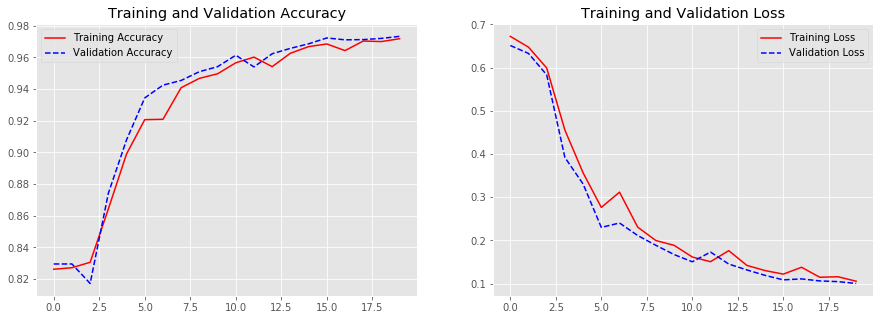

In [61]:
lstm_model1_history = {}
lstm_model1_history['loss'] = lstm_model1.history['loss']
lstm_model1_history['accuracy'] = lstm_model1.history['accuracy']
lstm_model1_history['val_loss'] = lstm_model1.history['val_loss']
lstm_model1_history['val_accuracy'] = lstm_model1.history['val_accuracy']
# Plot the training graph

plot_training_accuracy(lstm_model1_history)

The training accuracy and validation accuracy plot shows that it is not overfitting or underfitting in the model and same goes iwth that of the training and validation loss with the increase in the number of epochs.

In [62]:
from sklearn.metrics import classification_report, log_loss
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.101
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18160
           1       0.93      0.62      0.74       535
           2       0.93      0.90      0.91      1402
           3       0.81      0.65      0.72       158
           4       0.96      0.97      0.96      1635

    accuracy                           0.97     21890
   macro avg       0.92      0.82      0.86     21890
weighted avg       0.97      0.97      0.97     21890



The log loss is much lesser - 0.101 which is good, along with the values of precision and recall values which is all closer to 1 and seems like the values are almost correctly being predicted for all the 5 classes.

In [63]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1','2','3','4'],
                        columns=['pred_0', 'pred_1','pred_2','pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18030,23,51,19,37
1,181,330,19,1,4
2,106,3,1259,4,30
3,32,0,24,102,0
4,45,0,7,0,1583


In [64]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.101
0.99932075


The prediction probability of this model is 0.99 is good in this case,which determines probability of predicting the sample data to be in one of 5 classes that is calculated from available data .

#### Model Conclusion

The tuned LSTM model performed well. Looking at the loss and accuracy plots, we can derive the insight that there is no overfitting or underfitting The training accuracy plot depicts how the training accuracy for the model reaches the plateau during final epochs. This shows that model reaches a desired accuracy within 16 epochs.

The loss value curves stabilizes during the last few epochs of the entire duration of the training process. We can say that this model is a good model. The model is doing way better in comparison to the baseline model as the predictions are good. There is stability in the validation loss. 
We can safely conclude that this model of LSTM is good.

### Assessment Questions

1. What are the different activation functions applied for the gates?

Input Gate            : Sigmoid Function

Forget Gate           : Sigmoid Function

Output Gate           : Sigmoid Function

Input Modulation Gate : Hyperbolic Tangent Function

2. What is Vanishing gradient and exploding gradients?

Exploding Gradients are when the algorithm assigns a stupidly high importance to the weights, without much reason.
Vanishing gradients occur where the contribution from the earlier steps becomes insignificant in the gradient descent step.

3. How do we determine the values of Vanishing and exploding gradients?


We can determine them we see that loss is turning to Nan or having extremely high values. We can solve vanishing gradience problem by using relu activation function. On the other hand, exploding gradience can be overcome by using RMSProp and clipping the gradience to certain threshold.

4. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.001. We ran the model for 20 epochs.

5. How did the model perform with these values? Did it outperform the previous model?

These hyperparameters helped the model achieve the accuracy of 97% with a loss of 0.1. There is no overfitting in the model. This model did good in terms of accuracy as there is increase. The loss in this model is also significantly less compared to previous model. We can conclude that this tuned model is performing better than the baseline model.

6. How have you changed your layers in this model?

We added 4 LSTM layers and 3 dense layers. Along with this there was 1 dense layer to map the vectors to output for classification

7. How does it affect how quickly the network plateaus?

Looking at the loss and accuracy plots, we can derive the insight that there is no overfitting or underfitting The training accuracy plot depicts how the training accuracy for the model reaches the plateau during final epochs. This shows that model reaches a desired accuracy within 16 epochs.
The loss value curves stabilizes during the last few epochs of the entire duration of the training process. We can say that this model is a good model. The model is doing way better in comparison to the baseline model as the predictions are good. There is stability in the validation loss. We can safely conclude that this model of LSTM is good.

# PTBDB

The PTB Diagnostic database is an ECG Database. It has 14552 samples. It has 2 categories called normal and abnormal classs. The final column of each rowdenotes the class to which that example belongs to. This dataset has been taken from kaggle. The link for the datasource is as below:https://www.kaggle.com/shayanfazeli/heartbeat

# Exploratory Data analysis

Exploratory data analysis is the first step of the data analysis process. We will perform EDA on our dataset to see how the dataset is. Firstly, we will start off with looking at the shape of the dataset

In [9]:
ptbdb.shape

(14552, 188)

We will now see how the first few rows looks in our dataset.

In [30]:
ptbdb.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
ptbdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB


In the above cell, we see the info about the dataframe that we are using to build our models further. It has 14552 entries and 188 columns. The data type is float for tha values of the dataset and the total memory usageis 21MB.

In [32]:
ptbdb.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


describe() function of pandas is used to find teh basic statistical information about the dataset like count, mean, standard deviation, etc. The above stats are for the PTB Diagnostic dataset. The values of mean, std, min, max, the quartiles ranges are all closer. This means that there are no outliers in the dataset.

In [33]:
mitbih.isnull().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
Length: 188, dtype: bool

The above line of code checks if there are any null values in the dataset. If there are any, then we will need to handle them by either dropping them or replacing them with mean or median values.

In [34]:
ptbdb[187].value_counts()

1.0    10506
0.0     4046
Name: 187, dtype: int64

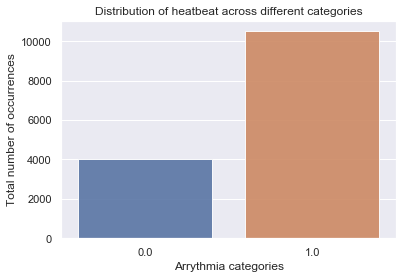

In [35]:
heartbeat_count = ptbdb[187].value_counts()
sns.set(style="darkgrid")
sns.barplot(heartbeat_count.index, heartbeat_count.values, alpha=0.9)
plt.title('Distribution of heatbeat across different categories')
plt.ylabel('Total number of occurrences', fontsize=12)
plt.xlabel('Arrythmia categories', fontsize=12)
plt.show()

The above cell indicaes the number of entries for each class. There are 2 classes 1 and 0. 0 represents normal beat and 1 represents abnormal beat that means myocardial infarction. There are more number of abnormal heartbeats than normal heartbeat.

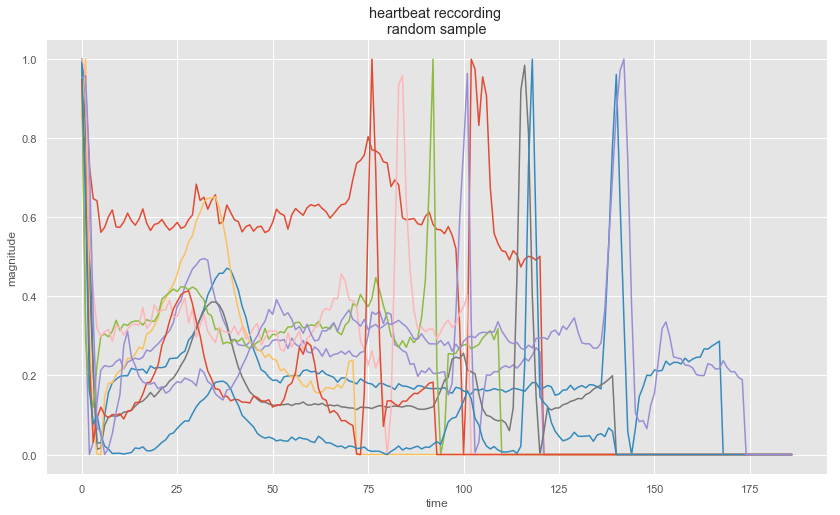

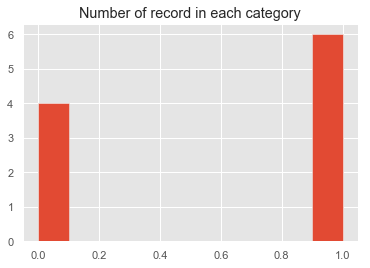

In [39]:
sample = ptbdb.sample(10)
# remove the target column
sampleX = sample.iloc[:,sample.columns != 187]
# plt samples
plt.figure(figsize=(14,8))
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0, 187)) ,row)

plt.xlabel("time")
plt.ylabel("magnitude")
plt.title("heartbeat reccording \nrandom sample")
plt.show()
plt.style.use("ggplot")
plt.title("Number of record in each category")
plt.hist(sample.iloc[:,sample.columns == 187].transpose())
plt.show()

The above cell is the visualization of few random heartbeat samples. we have takes the sample size of 10 and plotted the ECG sequences in graph for visualization. For the same 10 samples we are seeing the count for each group in the form of plots and graphs.

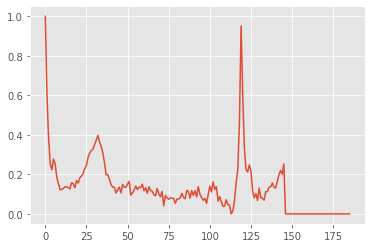

In [38]:
# show one data
plt.plot(ptbdb.iloc[1,:186])

In the above code, we have plotted the the second example of heartbeat from thet dataset.

Now will start building various models and see how each model performs. We will split X and Y accordingly for the different models as required.


# Logistic Regression

Logistic regresion is a predictive analysis, to be more particular, a regression analysis thatis suitable when the target variable is binary. It is used to describe data and establish the relationship between dependent binary variable and one or more independent variables.Logistic regression in this particular context answers the question of whether the person is affected by cardiac dysrrythmia or what is the probability of a person suffering from one. It predicts whether the given heartbeat sequence is normal or abnormal.
Logistic regression is estimated using Maximum likelihood estimation approach. Maximizing the likelihood functiond etermines the parameters that are most likely to produce the observed data. MLE sets the mean and variance as parameters in determining the specific oparametric values for a model. This parameters set can be used to predict data using a normal distribution.
The example equation for logistic regression is-

y = e^(b0 + b1x) / (1 + e^(b0 + b1x))

where y is predicted output,

b0 is bias or intercept term,

b1 is the coefficient for single input value x


In [14]:
X=ptbdb.drop([187],axis=1)
y=ptbdb[187]

In the above cell, we have determined what X and y values can be for building the model. Since the last column is the one determining whether the sequence is normal or abnormal, it will be y variable whereas teh rest of the columns can be in X.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

We now define train and test set using the variables in X and y using train_test_split. train_test_split is the sklearn.model_selection function taht splits the arrays or matrices to random train and test subsets.

#### Model development and training

In [17]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

Once the data is split into train and test set, we will import the logistic regression module. We instantiate the model using the default parameters. This means that we create th eLogistic regression classifier object using the LogisticRegression() function. We then fit the model with our train data using the fit() function and perform the predictions for y on test data using predict() function.

#### Model Evaluation and Predictions

Confusion matrix is a table that is used to evaluate the performance of our model. It has number of correct and incorrect predictions that are summed up in form of class. sklearn.metrics has the module required to build the confusion matrix.


In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 454,  308],
       [ 190, 1959]], dtype=int64)

We will plot the matrix in form of heatmap for visualizations. We know that 0 is the Normal class and 1 is abnormal class. So the number of correct predictions for normal and abnormal class are 454 and 1958 respectively. The false positive and false negatives counts are 308 and 191 respectively

Text(0.5, 15.0, 'Predicted label')

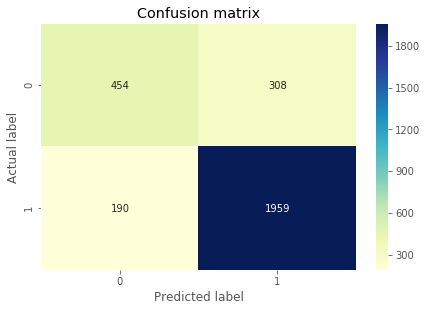

In [19]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.axis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Now, we will try to print 3 different scores. They are accuracy, precision and recall score. Accuracy-It is the ratio of correctly predicted observation to the total observations.
Accuracy = TP+TN/TP+FP+FN+TN

Precision:-It is the ration of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Recall-Recall is the ratio of correctly predicted positive observations over the total observations in the actual class.

Recall = TP/TP+FN


In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8289247681209206
Precision: 0.8641376268195854
Recall: 0.9115867845509539


Now. we will try to perform K-fold cross validtaion with k=5. Cross validations works in the way as given below: The data is divided in to 5 equal parts. We take a group as test set and remaining groups as train data set. We fit a model on train set and evaluate on test set. We retain the evaluation score for all iterations and take mean score. scoring metric for our method is f1_macro. It is a weighted average of Precision and Recall

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [21]:
rfc_cv_score = cross_val_score(logreg, X, y, cv=5, scoring='f1_macro').mean()

Note that we predicted for our testing data above. Now we will predict for train set. This way we can get 2 scores i.e. training and testing score. This will help us to see if the model is overfitting or underfitting.

In [22]:
y_pred1=logreg.predict(X_train)

Testing for over fitting of the dataset to confirm that the model is not over fitting.

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred1)

0.8312000687226183

In [24]:
accuracy_score(y_test,y_pred)

0.8289247681209206

Our train score is 0.83 and test score is 0.82. Both the scores are almost of smae value and there is no major difference between them. Hence the model is not overfitting. We will try to get the dummy variable for the predicted values. We will try to see what are the predicted values and save the results in to a CSV file.

We will now print and see the classification report for both the classes.

In [25]:
results = pd.get_dummies(y_pred)
results.columns = ['p0','p1']
results.tail(10)

,p0,p1
2901,0,1
2902,0,1
2903,0,1
2904,0,1
2905,0,1
2906,0,1
2907,0,1
2908,0,1
2909,0,1
2910,0,1


In [26]:
print("Classification Report")
print(classification_report(y_test, y_pred))
print('\n')
print("All AUC Scores")
print(rfc_cv_score)
print('\n')
print("Mean AUC Score")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65       762
         1.0       0.86      0.91      0.89      2149

   micro avg       0.83      0.83      0.83      2911
   macro avg       0.78      0.75      0.77      2911
weighted avg       0.82      0.83      0.82      2911



All AUC Scores
0.7701722350101651


Mean AUC Score
Mean AUC Score - Random Forest:  0.7701722350101651


AUC score is how much of the area is covered by ROC curve. A perfect classifier has the AUC score of 1.0. The range of 0.6-0.9 for AUC score is considered to be good classifier. Out AUC score is 0.77 which means model is good classifier.


In [29]:
results.to_csv('logistic_ptbdb.csv')

We have now exported the predicted values for logistic regression model in to CSV as mentioned in the above cell.

#### Model Conclusion
The logistic regression model performed well. The training and testing accuracy are almost similar. Thus we can derive that there is no overfitting or underfitting. The model accuracy is 82% and AUC score is 0.77 which means model is good classifier. The model is doing decent as the predictions are good.

### Assessment Questions

1. What is Probability and likelihood?

Probability is the chance of an event to occur whereas likelihood is the conditional probability of an event occuring considering past occurences.



2. Write the equation for multiple Logistic Regression.

logit(p)=log(p(1-p)) = beta0 + beta1X1 + beta2X2 +.....+ betanXn + e




3. What is the accuracy of the model? How well did it classify?

The logistic regression model performed well. The training and testing accuracy are almost similar. Thus we can derive that there is no overfitting or underfitting. The model accuracy is 82% and AUC score is 0.77 which means model is good classifier. The model is doing decent as the predictions are good.


## Convolutional Neural Network (CNN)

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in input datastet, assign weights to various aspects in the image and be able to differentiate one from the other. They are made up of neurons with learnable weights and biases. Each specific neuron receives numerous inputs and then takes a weighted sum over them, where it passes it through an activation function and responds back with an output.The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.
The layers in the CNN model consistes of a Convolutional Layer, Activation Layer, Pooling Layer, and Fully Connected Layer, these are all interconnected so that CNNs can process and perceive data in order to classify data.
Lets start with the baseline model and see how that works out.

### Baseline Model

#### Model developement and training

We are determining the X and y values again in this section. We are converting the target variable to categorical column using the to_categorical() function provided by tensorflow.keras.utils class. We will split our train and test data using train_test_split(). We are trying to reshape the X_train and y_train infor of 3 elements in an array so that ConvNet takes the input shape. We will be using Conv1D to build our CNN model.
Conv1D works well with the time series data hence we are using the 1D instead of 2D. 1D allows us to use large filter sizes. This means that in 1D networks, a filter size of say 7 contains only 7 features. We can afford to use large convolutional windows with 1D.

In [41]:
X=ptbdb.iloc[:,:187].values
target=ptbdb[187]
y=to_categorical(target)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

Let us check the shape of all the X and y subsets.

In [42]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(11641, 187, 1)
(11641, 2)
(2911, 2)
(2911, 187, 1)


In the CNN model built below, we have used Conv1D with filters-32,64,128 and 256. Kernel size used are 6 and 3. MaxPooling1D uses pool_size of value 3 and 2 and padding as "same". Dense layer has 64,32 and 2 output units with relu as activation function. The final dense layer should have 2 units and activation function should be changes to softmax because the data gets classified to 2 classes i.e. normal and abnormal(0,1).

ReLU: It is called rectified Linear unit. Equation :- A(x) = max(0,x). It gives an output x if x is positive and 0 otherwise. Its nature is non-linear, which means that can easily backpropagate the errors and have multiple layers of neurons being activated by the ReLU function.

Softmax:It is able to handle multiple classes. It normalizes the outputs for each class between 0 and 1 and divides by their sum, giving the probability of the input value being in a specific class. It is used only for the output layer, for neural networks that need to classify inputs into multiple categories.

In [57]:
train_input_shape=(187,1)
model = models.Sequential()
model.add(layers.Conv1D(32, (6), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(3), strides=(2), padding="same"))

model.add(layers.Conv1D(64, (6), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Conv1D(128, (3), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Conv1D(256, (3), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 182, 32)           224       
_________________________________________________________________
batch_normalization_8 (Batch (None, 182, 32)           128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 91, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 86, 64)            12352     
_________________________________________________________________
batch_normalization_9 (Batch (None, 86, 64)            256       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 43, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 41, 128)          

For the above model, we need to compile the model and fit the model to train the data. We will use ADAM optimizer for compiling the model. Adam is an optimization algorithm that can be used to update network weights iteratively based in training data. We will specify learning rate argument. Its value determines how fast the weights change. If learning rate is too high derivative may miss the 0 slope point or if the learning rate is too low then it may take forever to reach that point.
So we need to provide a balanced learning rate. We will start off with 0.01 as initial value.

We will compile the model using model.compile() function. For this the arguments are loss function, optimizer and the metrics. The loss function we will be using is categorical cross entropy. It measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.


Then we will fit the model with data using model.fit(). This will train the model for the fixed number of epochs. X_train will be our input data, y_train will be our target data. Batch size=128 means that we are sending 128 samples for each gradient update. validation_data is the data on which the loss is evaluated and any model metrics(in this case accuracy) at the end of each epoch. The model will not be trained on this data.



In [58]:
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_ptbdb_cnn = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Train on 11641 samples, validate on 2911 samples
Epoch 1/30
11641/11641 [==============================] - 19s 2ms/sample - loss: 0.5042 - accuracy: 0.7893 - val_loss: 0.9124 - val_accuracy: 0.7032
Epoch 2/30
11641/11641 [==============================] - 16s 1ms/sample - loss: 0.2670 - accuracy: 0.8788 - val_loss: 1.2611 - val_accuracy: 0.7338
Epoch 3/30
11641/11641 [==============================] - 17s 1ms/sample - loss: 0.1830 - accuracy: 0.9254 - val_loss: 1.6701 - val_accuracy: 0.7348
Epoch 4/30
11641/11641 [==============================] - 16s 1ms/sample - loss: 0.1520 - accuracy: 0.9387 - val_loss: 0.4596 - val_accuracy: 0.8368
Epoch 5/30
11641/11641 [==============================] - 16s 1ms/sample - loss: 0.1009 - accuracy: 0.9626 - val_loss: 1.2475 - val_accuracy: 0.7582
Epoch 6/30
11641/11641 [==============================] - 16s 1ms/sample - loss: 0.0712 - accuracy: 0.9747 - val_loss: 0.8960 - val_accuracy: 0.8008
Epoch 7/30
11641/11641 [==============================] -

We will now find the mean of loss and accuracy over test data whose batch size that we are providing is 32.

#### Model Evaluation and predictions

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

2911/2911 [==============================] - 1s 363us/sample - loss: 1.5452 - accuracy: 0.8272
1.5452222316300324 0.82720715


The loss generated for this CNN model is 0.51 and accuracy is 0.90. Now let us plot the training and validation loss and accuracy. The fit() method of keras model returns a history object that records the loss and acuuracy values during the training. We are storing the same in a dict form and we call the plot_training_accuracy() function where we pass the dictionary as arguments.


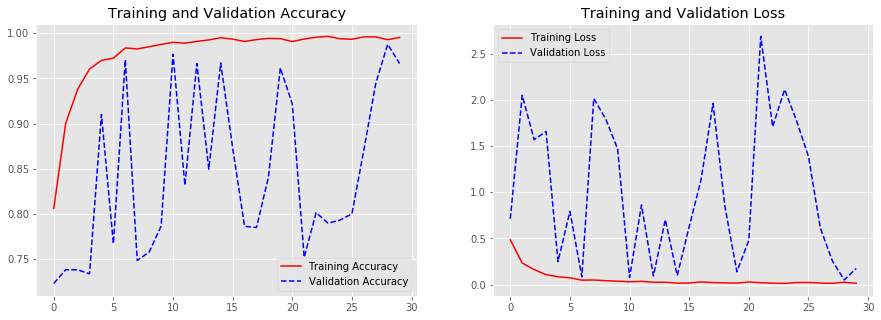

In [60]:
model_ptbdb_cnn_hist = {}
model_ptbdb_cnn_hist['loss'] = model_ptbdb_cnn.history['loss']
model_ptbdb_cnn_hist['accuracy'] = model_ptbdb_cnn.history['accuracy']
model_ptbdb_cnn_hist['val_loss'] = model_ptbdb_cnn.history['val_loss']
model_ptbdb_cnn_hist['val_accuracy'] = model_ptbdb_cnn.history['val_accuracy']
plot_training_accuracy(model_ptbdb_cnn_hist)

We see that training accuracy and loss is constant through out. But the validaytion accuracy and loss is fluctuating too much. We need to handle this. We can do this in various ways. We can increase the number of epochs, the optimizer function, the cost function or the value of learning rate.
Now we will predict over test data. We will see the log loss and print the classification report.

In [179]:
# check on validation set
y_pred = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.490
log loss : 0.490
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       762
           1       0.88      1.00      0.94      2149

    accuracy                           0.90      2911
   macro avg       0.94      0.81      0.85      2911
weighted avg       0.91      0.90      0.89      2911



We calculate the prediction probability for the data. It is the probability of an event that is calculated from available data.

In [180]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.490
1.0


Our log loss value is 0.49 and prediction_probability value is 1.0. Let us now tune few hyperparameters to try and improve the model since there is overfitting in this model.

#### Model Conclusion
The baseline CNN model performed well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. The network reaches the plateau within 15 epochs. However, there is no stability in the validation accuracy. We can assume that it can be stabilised by increasing the number of epochs.

The loss value curves of the this model stabilizes and reaches a plateau within 15 epochs. However, there is no stability in the validation loss. 

But from the scores , we can conclude that it is a decent model and can be improved.

### Assessment Questions

1. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.01 Upon adding these for a 4 layered CNN, we ran the model for 30 epochs.

2. How did the model perform with these values?

These hyperparameters achieved the accuracy of 82% with a loss of 1.54 and log loss of 0.49. The loss is too high and can be

3. What other activation functions can be used other than relu?

We can use elu, leakyRelu.

4. What is Cost Function?

A cost function is a measure of the accuracy of neural network with respect to the given training sample and expected output. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.

5. what is Gradient descent?

Gradient descent is an optimization algorithm, which is used to learn the value of parameters that minimizes the cost function.

6. What is Backpropagation?

Backpropagation is a training algorithm used for a multilayer neural network. In this method, we move the error from an end of the network to all weights inside the network and thus allowing efficient computation of the gradient. 


7. How does it affect how quickly the network plateaus?

The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. The network reaches the plateau within 15 epochs. However, there is no stability in the validation accuracy. We can assume that it can be stabilised by increasing the number of epochs. The loss value curves of the this model stabilizes and reaches a plateau within 15 epochs. However, there is no stability in the validation loss.

### Tuning hyperparameters for CNN

#### Model development and training

We will increase the number of convolutional lyers. We have increased the layers from 4 to 5.

In [52]:
train_input_shape=(187,1)
model = models.Sequential()
model.add(layers.Conv1D(32, (3), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(3), strides=(2), padding="same"))

model.add(layers.Conv1D(64, (5), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Conv1D(128, (5), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Conv1D(256, (3), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Conv1D(512, (5), activation='relu', input_shape=(train_input_shape)))
model.add(BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2), padding="same"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 185, 32)           128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 185, 32)           128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 93, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 89, 64)            10304     
_________________________________________________________________
batch_normalization_4 (Batch (None, 89, 64)            256       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 45, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 41, 128)          

We will change the optimizer function from Adam to SGD with learning rate=0.001 and increase the epochs to 50. SGD is a gradient descent optimization algorithms wherein one update is performed at a time. It performs the frequent updates with high variance.

In [53]:
sgd = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model_ptbdb_cnn2 = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Train on 11641 samples, validate on 2911 samples
Epoch 1/50
11641/11641 [==============================] - 41s 3ms/sample - loss: 0.4345 - accuracy: 0.7981 - val_loss: 0.6294 - val_accuracy: 0.7382
Epoch 2/50
11641/11641 [==============================] - 36s 3ms/sample - loss: 0.2809 - accuracy: 0.8868 - val_loss: 0.5893 - val_accuracy: 0.7382
Epoch 3/50
11641/11641 [==============================] - 37s 3ms/sample - loss: 0.2248 - accuracy: 0.9108 - val_loss: 0.5658 - val_accuracy: 0.7382
Epoch 4/50
11641/11641 [==============================] - 42s 4ms/sample - loss: 0.1854 - accuracy: 0.9321 - val_loss: 0.6202 - val_accuracy: 0.7382
Epoch 5/50
11641/11641 [==============================] - 37s 3ms/sample - loss: 0.1623 - accuracy: 0.9442 - val_loss: 0.6989 - val_accuracy: 0.7382
Epoch 6/50
11641/11641 [==============================] - 36s 3ms/sample - loss: 0.1439 - accuracy: 0.9504 - val_loss: 0.4826 - val_accuracy: 0.7650
Epoch 7/50
11641/11641 [==============================] -

#### Model Evaluations and predictions

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

2911/2911 [==============================] - 2s 616us/sample - loss: 0.0616 - accuracy: 0.9801
0.0616120066185335 0.9800756


We will now compare the training loss and accuracy for the above 2 CNN models.

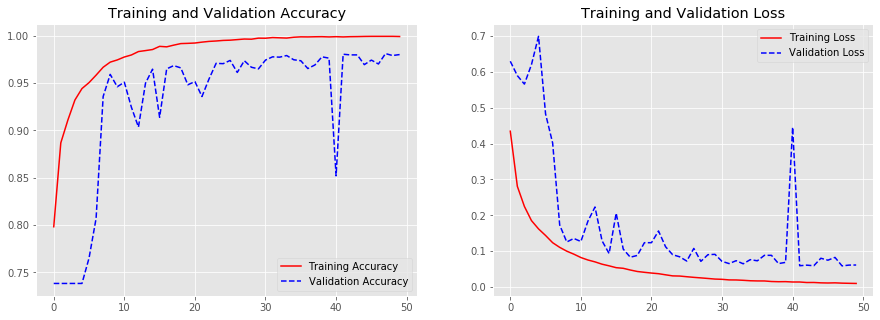

In [55]:
model_ptbdb_cnn_hist = {}
model_ptbdb_cnn_hist['loss'] = model_ptbdb_cnn2.history['loss']
model_ptbdb_cnn_hist['accuracy'] = model_ptbdb_cnn2.history['accuracy']
model_ptbdb_cnn_hist['val_loss'] = model_ptbdb_cnn2.history['val_loss']
model_ptbdb_cnn_hist['val_accuracy'] = model_ptbdb_cnn2.history['val_accuracy']
plot_training_accuracy(model_ptbdb_cnn_hist)

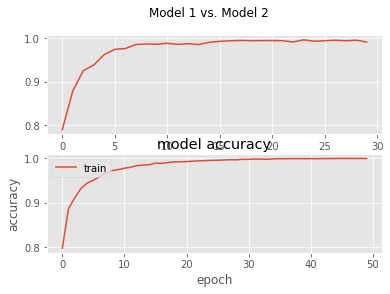

In [60]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(model_ptbdb_cnn.history['accuracy'])
ax2.plot(model_ptbdb_cnn2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

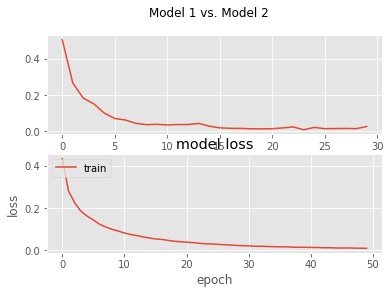

In [61]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Model 1 vs. Model 2')
ax1.plot(model_ptbdb_cnn.history['loss'])
ax2.plot(model_ptbdb_cnn2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [62]:
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 1.545
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       762
           1       0.81      1.00      0.90      2149

    accuracy                           0.83      2911
   macro avg       0.91      0.67      0.70      2911
weighted avg       0.86      0.83      0.79      2911



In the above cell, we have predicted the values for test data with the model that was generated. The log loss valueis 0.19 which is very low and good. We will print the confusion matrix to see the number of correct and incorrect predictions.

In [63]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1'],
                        columns=['pred_0', 'pred_1'])
confusion_mat

,pred_0,pred_1
0,259,503
1,0,2149


The number of correct and incorrect predictions are 670 and 2148 for both the classes. We have calculated the prediction probability for the model in the given code below.

In [64]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 1.545
1.0


#### Model conclusion

The tuned model worked well with accuracy of 98% and loss of 0.06. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. The network reaches a plateau within 20 epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is closely fitting the training accuracy curve thereby attaining the stability and reaching the plateau. 

The loss value curves of the this model reduces with the increase in the number of epochs. It reaches a plateau within 30 epochs. The validation loss plot is also closely fitting the training loss curve thereby attaining the stability and reaching the plateau.

We can say that the tuned model is a good model in comparison.

### Assessment Questions

1. Why are you using Activation Function?

The activation function is used to introduce non-linearity to the model helping it to learn more complex functions. It is used to fire up the nodes based on the weights. We can use different types of activation functions like, relu, elu, softmax, sigmoid, LeakyRelu, tanh etc.


2. What were the hyperparameters used in this model?
With the SGD optimizer we used the learning rate of 0.001. Upon adding these for a 5 layered CNN, we ran the model for 50 epochs.


3. How did the model perform with these values? Did it outperform the previous model?

These hyperparameters helped the model achieve the accuracy of 98% with a loss of 0.06. This model did good in terms of accuracy as there is a increase. The loss in this model is than the baseline model. Taking loss into picture, we can conclude that this model is performing better than previous model.

4. How have you changed your layers in this model?

We have added 5 fully connected convolutional layers. In these layers, we have added Dropout rate of 0.25 to prevent the overfitting.

5. Why have you used BatchNormalization()?

It normalizes the input layer by adding weights as usual but does not add bias.

6. How does it affect how quickly the network plateaus?

The tuned model worked well. The training accuracy plot depicts how the training accuracy for baseline model increases with the number of epochs. The network reaches a plateau within 20 epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is closely fitting the training accuracy curve thereby attaining the stability and reaching the plateau.The loss value curves of the this model reduces with the increase in the number of epochs. It reaches a plateau within 30 epochs. The validation loss plot is also closely fitting the training loss curve thereby attaining the stability and reaching the plateau.

## Long Short Term Memory (LSTM)

### Baseline model

#### Model development and training

Building baseline model we start off with an instance of a Sequential class, followed by the fully connected dense layer which specifies the input shape of the data which in our case is (187,1) that icnludes 187 columns of data and 1 target columns predicting 2 different classes.Followed by stacking LSTM layer with relu activation function which is most commonly used which is a linear function that will output the input directly if is positive, otherwise, it will output zero.
Dense layer is a fully connected layer that often follows LSTM layers and is used for outputting a prediction using softmax activation function to predict the probabilities into 2 different classes or it outputs a vector that represents the probability distributions of a list of potential outcomes. 

In this model, we have used 3 LSTM layers followed by 2 fully connected layers that is connecting to the output that will predict 2 classes.

In [99]:
train_input_shape=(187,1)
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=train_input_shape))
model.add(LSTM(64,return_sequences=True))

model.add(Dense(64,activation='relu'))
model.add(LSTM(64,return_sequences=True))

#model.add(Dense(128,activation='relu'))
#model.add(LSTM(64,return_sequences=True))

model.add(LSTM(64))
model.add(Dense(2,activation='softmax'))

We are setting the hyperparameters such as learning rate or the step size it is proportion that weights are updated (e.g. 0.001). Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) slow learning right down during training. We are trying to find the optimal value here by using 0.01 as the starting learning rate using trial and approach method.

Then we try to fit the model by setting the number of epochs = 10 which means a measure of the number of times all of the training vectors are used once to update the weights, also batch size is given 64 that refers to the number of training samples out of the entire dataset utilized in one iteration

In [191]:
opt = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lstm_ptbdb_model = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Train on 11641 samples, validate on 2911 samples
Epoch 1/10
11641/11641 [==============================] - 127s 11ms/sample - loss: 0.5991 - accuracy: 0.7150 - val_loss: 0.5751 - val_accuracy: 0.7382
Epoch 2/10
11641/11641 [==============================] - 131s 11ms/sample - loss: 0.5964 - accuracy: 0.7179 - val_loss: 0.5790 - val_accuracy: 0.7382
Epoch 3/10
11641/11641 [==============================] - 140s 12ms/sample - loss: 0.5956 - accuracy: 0.7179 - val_loss: 0.5753 - val_accuracy: 0.7382
Epoch 4/10
11641/11641 [==============================] - 133s 11ms/sample - loss: 0.5956 - accuracy: 0.7179 - val_loss: 0.5802 - val_accuracy: 0.7382
Epoch 5/10
11641/11641 [==============================] - 135s 12ms/sample - loss: 0.5957 - accuracy: 0.7179 - val_loss: 0.5760 - val_accuracy: 0.7382
Epoch 6/10
11641/11641 [==============================] - 136s 12ms/sample - loss: 0.5954 - accuracy: 0.7179 - val_loss: 0.5759 - val_accuracy: 0.7382
Epoch 7/10
11641/11641 [=====================

#### Model Evaluation and predictions

In [192]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

2911/2911 [==============================] - 15s 5ms/sample - loss: 0.5752 - accuracy: 0.7382
0.5751912037313128 0.7382343


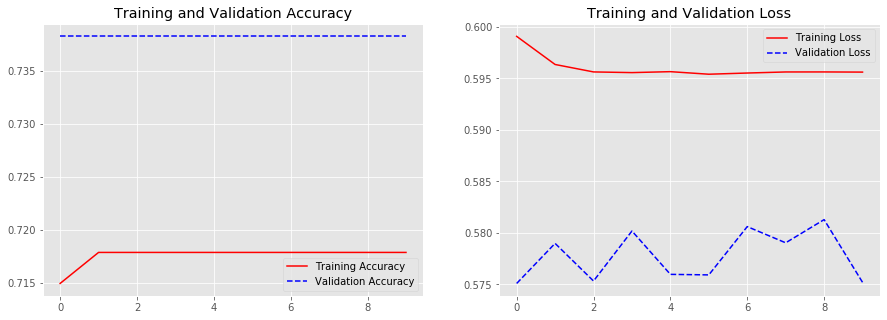

In [193]:
lstm_ptbdb_history = {}
lstm_ptbdb_history['loss'] = lstm_ptbdb_model.history['loss']
lstm_ptbdb_history['accuracy'] = lstm_ptbdb_model.history['accuracy']
lstm_ptbdb_history['val_loss'] = lstm_ptbdb_model.history['val_loss']
lstm_ptbdb_history['val_accuracy'] = lstm_ptbdb_model.history['val_accuracy']

plot_training_accuracy(lstm_ptbdb_history)

From the above plot we infer that, Testing accuracy and training accuracy is not much of a difference, the values are pretty close in the range of 0.731 to 0.735 with the number of epochs. Also speaking with respect to the loss graph, the values of training loss and testing loss with the number of epochs is also closely similar ranging from 0.575 to 0.60.Hence it is not overfitting or underfitting.

In [194]:
# check on validation set
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.575
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       762
           1       0.74      1.00      0.85      2149

    accuracy                           0.74      2911
   macro avg       0.37      0.50      0.42      2911
weighted avg       0.54      0.74      0.63      2911



With the above classification report we see that precision value is zero for most of the classes except class - 0 which means that prediction values did not have nay true positives predicted. The log loss is 0.575 which is slighlty higher and closer to 1 than an ideal value of zero.

In [195]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1'],
                        columns=['pred_0', 'pred_1'])
confusion_mat

,pred_0,pred_1
0,0,762
1,0,2149


Here , the confusion matrix is not being predicted properpy because all the values lie within predicted class 1 which is not the ideal case with the real test set.

In [196]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.575
0.72745436


The log loss value is pretty high - 0.575 and the accuracy of this model is also comparitively lesser which is 73%, along with the wrongly predicting the predictions of each classes. Hence, we will be tuning the hyperparameters and increasing the number of layers along with the number of epochs to better classify each of those 2 classes

#### Model Conclusion

The LSTM baseline model did good. The training accuracy plot depicts how the training accuracy for baseline model increased slightly and then plateaued and remained constant throughout.. The network reaches a plateau within first few epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is almost fitting the training accuracy curve as the difference is just in range of 0.02-0.04 thereby attaining the stability and reaching the plateau.

The loss value curves of the this model reduces with the increase in few number of epochs. It reaches a plateau within 5 epochs. The validation accuracy plot is almost fitting the training loss curve but there is no stability in the validation curve.

By looking at the confusion matrix, we can derive that the predictions were incorrect as all heartbeat sequences were predicted to be abnormal. This is clearly untrue. We can say that the model can be improved by tuning the hyperparameters.

### Assessment Questions

1. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.01. Upon adding these for a 3 layered LSTM model, we ran the model for 10 epochs.

2. How did the model perform with these values?

These hyperparameters helped the model achieve the accuracy of 73% with a loss of 0.57. This model did not perform well in terms of accuracy. Also, the loss in this model is more than the previously built models like CNN. The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 1 i.e abnormal heartbeat which is clearly untrue. With all theses reasons, we can conclude that this model is not performing better and can be improved with hyperparameter tuning.

3. What do you infer from the confusion matrix that you have created?

The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 0 i.e normal heartbeat which is clearly untrue. We need to improvise the model.

4. How does it affect how quickly the network plateaus?

The training accuracy plot depicts how the training accuracy for baseline model increased slightly and then plateaued and remained constant throughout.. The network reaches a plateau within first few epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is almost fitting the training accuracy curve as the difference is just in range of 0.02-0.04 thereby attaining the stability and reaching the plateau.
The loss value curves of the this model reduces with the increase in few number of epochs. It reaches a plateau within 5 epochs. The validation accuracy plot is almost fitting the training loss curve but there is no stability in the validation curve.

## Tuning hyperparameters for LSTM

#### Model development and training

Building model 2 with 4 layers of LSTM layers with different filters 32,64, 128 and 64 again that is followed by the dense layer that is used to output the prediction into each of the classes using softmax activation function. Return sequenecs returns the hidden state output for each input time step. Here we are setting return_sequences=True when stacking LSTM layers so that the second LSTM layer has input shape as sequence input to the next layer and to the same layer.

In [43]:
train_input_shape=(187,1)
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=train_input_shape))
model.add(LSTM(64,return_sequences=True))

model.add(Dense(64,activation='relu'))
model.add(LSTM(64,return_sequences=True))

model.add(Dense(128,activation='relu'))
model.add(LSTM(64,return_sequences=True))

model.add(LSTM(64))
model.add(Dense(2,activation='softmax'))

Setting learning rate to 0.008 for this model, slightly decreasing the learning rate from 0.1 to 0.001 compared to the first model so that model learns a bit slower than rapidly learning from the first model. We have increased the number of epochs from 10 to 15 and batch size is 64.

In [44]:
opt = Adam(lr = 0.008)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
lstm_ptbdb_model2 = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Train on 11641 samples, validate on 2911 samples
Epoch 1/20
11641/11641 [==============================] - 216s 19ms/sample - loss: 0.6033 - accuracy: 0.7141 - val_loss: 0.5751 - val_accuracy: 0.7382
Epoch 2/20
11641/11641 [==============================] - 215s 18ms/sample - loss: 0.5957 - accuracy: 0.7179 - val_loss: 0.5774 - val_accuracy: 0.7382
Epoch 3/20
11641/11641 [==============================] - 220s 19ms/sample - loss: 0.5960 - accuracy: 0.7179 - val_loss: 0.5785 - val_accuracy: 0.7382
Epoch 4/20
11641/11641 [==============================] - 231s 20ms/sample - loss: 0.5956 - accuracy: 0.7179 - val_loss: 0.5749 - val_accuracy: 0.7382
Epoch 5/20
11641/11641 [==============================] - 197s 17ms/sample - loss: 0.5961 - accuracy: 0.7179 - val_loss: 0.5797 - val_accuracy: 0.7382
Epoch 6/20
11641/11641 [==============================] - 203s 17ms/sample - loss: 0.5959 - accuracy: 0.7179 - val_loss: 0.5764 - val_accuracy: 0.7382
Epoch 7/20
11641/11641 [=====================

#### Model Evaluation and predictions

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(loss, accuracy)

2911/2911 [==============================] - 16s 5ms/sample - loss: 0.5756 - accuracy: 0.7382s - loss: 0.5750 - accuracy: 0.73
0.5755865190783468 0.7382343


The accuracy of this model is same as that of the previous model which is 73% and loss is also similar to the previous model which is 0.57.

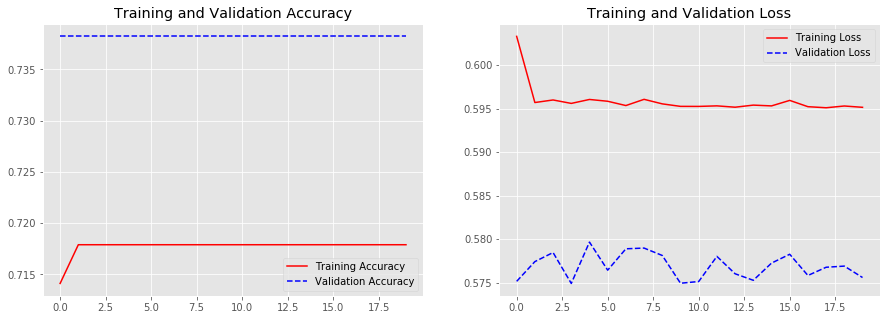

In [48]:
lstm_ptbdb_history2 = {}
lstm_ptbdb_history2['loss'] = lstm_ptbdb_model2.history['loss']
lstm_ptbdb_history2['accuracy'] = lstm_ptbdb_model2.history['accuracy']
lstm_ptbdb_history2['val_loss'] = lstm_ptbdb_model2.history['val_loss']
lstm_ptbdb_history2['val_accuracy'] = lstm_ptbdb_model2.history['val_accuracy']

plot_training_accuracy(lstm_ptbdb_history2)

The training accuracy and validation accuracy plot shows that it is not overfitting or underfitting in the model and same goes with that of the training and validation loss with the increase in the number of epochs. Though they are fluctuating in accuracy plot, the difference is very negligible(0.715-0.755).

In [49]:
# check on validation set
from sklearn.metrics import log_loss
y_pred = model.predict(X_test, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

log loss : 0.576
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       762
           1       0.74      1.00      0.85      2149

    accuracy                           0.74      2911
   macro avg       0.37      0.50      0.42      2911
weighted avg       0.54      0.74      0.63      2911



The log loss is much lesser - 0.57 which is same as the previous model.

In [50]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))),
                         index = ['0', '1'],
                        columns=['pred_0', 'pred_1'])
confusion_mat

,pred_0,pred_1
0,0,762
1,0,2149


The values of confusion matrix proves that the values are being predicted incorrectly. Hence we can safely say that LSTM is not a good fit for predicting the abnormality/normality of the heartbeats in this case.

In [51]:
prediction = model.predict(X_test)
print("log loss : {:.3f}".format(log_loss(y_test, y_pred)))
prediction_probability = np.amax(prediction)
#prediction_idx = np.argmax(prediction)
print(prediction_probability)

log loss : 0.576
0.72168064


The prediction probability of this model is 0.709 is good in this case,which determines probability of predicting the sample data to be in one of 5 classes that is calculated from available data .

#### Model Conclusion

The LSTM tuned model did good. The training accuracy plot depicts how the training accuracy for tuned model increased slightly and then plateaued and remained constant throughout. The network reaches a plateau within first few epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is almost fitting the training accuracy curve as the difference is just 0.01 thereby attaining the stability and reaching the plateau.

The loss value curves of the this model reduces with the increase in few number of epochs. It reaches a plateau within 15 epochs. The validation accuracy plot is almost fitting the training loss curve but there is little stability in the validation curve.

By looking at the confusion matrix, we can derive that the predictions were incorrect as all heartbeat sequences were predicted to be abnormal. This is clearly untrue.

#### Assessment Questions

1. What were the hyperparameters used in this model?

With the Adam optimizer we used the learning rate of 0.008. We ran the model for 20 epochs.

2. How did the model perform with these values? Did it outperform the previous model?

These hyperparameters helped the model achieve the accuracy of 73% with a loss of 0.5. This model did not perform well in terms of accuracy. Also, the loss in this model is more than the previously built models like CNN. The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 1 i.e abnormal heartbeat which is clearly untrue. With all theses reasons, we can conclude that this model is not performing better and can be improved with hyperparameter tuning.

3. How have you changed your layers in this model?

We added 4 LSTM layers and 3 dense layers. Along with this there was 1 dense layer to map the vectors to output for classification

4. What can you infer from the confusion matrix?

The confusion matrix depicts that the predictions are wrong as all sequences are being predicted as 0 i.e normal heartbeat which is clearly untrue. We need to improvise the model.

5. How does it affect how quickly the network plateaus?

The training accuracy plot depicts how the training accuracy for tuned model increased slightly and then plateaued and remained constant throughout. The network reaches a plateau within first few epochs. Training accuracy plot is thereby attains stability. The validation accuracy plot is almost fitting the training accuracy curve as the difference is just 0.01 thereby attaining the stability and reaching the plateau.
The loss value curves of the this model reduces with the increase in few number of epochs. It reaches a plateau within 15 epochs. The validation accuracy plot is almost fitting the training loss curve but there is little stability in the validation curve.

# Conclusion

##### MITBIH - 

| Model name | Accuracy| Loss | LogLoss |
| --- | --- | --- | --- |
| Random forest | 97.2% | - | - |
| Support Vector Machines | 96.8% | - | - |
| CNN Baseline model | 98.4% | 0.059 | 0.060 |
| CNN tuned model | 98.6% | 0.09 | 0.098 |
| LSTM Baseline model | 82.72% | 0.66 | 0.665 |
| LSTM tuned model | 97.3% | 0.10 | 0.101 |

To visualize the reults of all the models for both the datasets, we have constructed a table to depict accuracy, loss and logloss values of respective models. From the above table, we confirm that our Convolutional neural network outperforms the SVM, random forest, and LSTM model in the multi-classification problem. 

As indicated by the training accuracies, the neural network, random forest, and SVM tend to fit (or closely fit) the training data perfectly. However, we know these
models are not memorizing the input data since the test accuracies are above 80% in multiclass case.

The LSTM tuned model and CNN baseline model worked well in neural networks. In supervised learning algorithms, Random forest did a good job with predictions. Hence, these are our best models.

##### PTBDB -

| Model name | Accuracy| Loss | LogLoss |
| --- | --- | --- | --- |
| Logistic regression | 82% | - | - |
| CNN Baseline model | 82.7% | 1.54 | 0.49 |
| CNN tuned model | 98% | 0.06 | 0.54 |
| LSTM Baseline model | 73.8% | 0.57 | 0.57 |
| LSTM tuned model | 73% | 0.57 | 0.576 |

To visualize the reults of all the models for both the datasets, we have constructed a table to depict accuracy, loss and logloss values of respective models. From the above table, we confirm that our Convolutional neural network outperforms the SVM, random forest, and LSTM model in the multi-classification problem. As indicated by the training accuracies, the neural network, random forest, and SVM tend to fit (or closely fit) the training data perfectly. However, LSTM did not fit in this case and proved to be a bad model. We know that these models are not memorizing the input data since the test accuracies are above 70% in binary classification case.

The CNN tuned model worked well in neural networks. In supervised learning algorithms, logistic regression did a good job with predictions. Hence these are our best models.

# Contributions

#### MITBIH: 

Implemented 2 supervised learning algorithms like Support vector machines and random forest.

Implemented 4 neural network models with both CNN and LSTM

Performed hyperparameter tuning for both CNN and LSTM models

Compared models built for MITBIH dataset

Evaluated the models using different metrics for the model like loss, accuracy, logloss, confusion matrix, precision, recall, f1 score, support, prediction probability.



#### PTBDB: 

Implemented 1 supervised learning algorithms like logistic regression.

Implemented 4 neural network models with both CNN and LSTM

Performed hyperparameter tuning for both CNN and LSTM models

Compared models built for PTBDB dataset

Evaluated the models using different metrics for the model like loss, accuracy, logloss, confusion matrix, precision, recall, f1 score, support, prediction probability.

Team contribution: 65%
External sources: 35%

# ReadMe

### Tools

 1) Python 3.6, pandas = 0.24.2, Numpy=1.18.1, tensorflow = 1.9.0, matplotlib = 3.0.2 , seaborn = 0.9, scipy = 1.4.1, scikit-learn = 0.20
 
 2)	Jupyter Notebook
 
### Future Enhancements

Future work can include the usage of PCA for feature extraction. Apart from this, we can explore the usage of ECG time series data. We can let the neural networks itself to extract features from raw time series data by its own.

### Steps to be followed to code using Jupyter notebook and Python 3.6

To setup on your local machine:

1) Install Anaconda with Python >= 3.6

2) Start the Jupyter notebook server

3) Download the data from the attached datasheet link (mitbih_train.csv; mitbih_test.csv; ptbdb_normal.csv; ptbdb_abnormal.csv)

### Step to be followed to run the notebook

 1) Download the Jupyter notebook along with the data attached.
 
 2) Click on Run for each cell in the notebook to see what the particular code is doing
 
 3) Read the description to analyze insights from each cell of the notebook.

# Citations

1. https://towardsdatascience.com/classification-using-neural-networks-b8e98f3a904f                                      

2. https://towardsdatascience.com/diagnostic-for-heart-disease-with-machine-learning-81b064a3c1dd 

3. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-satellite-photos-of-the-amazon-rainforest/

4. https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c

5. https://www.kaggle.com/shayanfazeli/heartbeat                              

6. https://www.kaggle.com/alexandrefarb/mitbih-arrhythmia-database-de-chazal-class-labels

7. https://towardsdatascience.com/tensorflow-gpu-installation-made-easy-use-conda-instead-of-pip-52e5249374bc

8. https://towardsdatascience.com/setup-an-environment-for-machine-learning-and-deep-learning-with-anaconda-in-windows-5d7134a3db10

9. http://colah.github.io/posts/2015-08-Understanding-LSTMs/

10. https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714

11. https://github.com/nikbearbrown/INFO_7390/blob/master/Deep_Learning/

12. https://www.statisticshowto.com/probability-and-statistics/data-analysis/

13. https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

14. http://cs229.stanford.edu/proj2014/Albert%20Haque,%20Cardiac%20Dysrhythmia%20Detection%20with%20GPU-Accelerated%20Neural%20Networks.pdf

15. https://www.tensorflow.org/guide/keras/rnn

16. https://www.geeksforgeeks.org/long-short-term-memory-networks-explanation/

# LICENSE

Copyright 2019, Chaitanya Prasanna Kumar(001494892) , Sahana Jangali(001491367)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.